## Im going with random forest to train my model as im a bit more comfortable with this one and from my understanding its more accurate


In [ ]:
import pandas as pd
import joblib
import pathlib
from taxipred.utils.constants import CLEANED_CSV_PATH
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(CLEANED_CSV_PATH)
df.head()


,Time_of_Day,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
Trip_Distance_km,,,,,,
19.35,Morning,3.56,0.80,0.32,53.82,36.2624
36.87,Evening,2.70,1.21,0.15,37.27,52.9032
30.33,Evening,3.48,0.51,0.15,116.81,36.4698
8.64,Evening,2.93,0.63,0.32,22.64,15.6180
8.64,Afternoon,2.55,1.71,0.48,89.33,60.2028


In [3]:
df.isnull().sum()

Time_of_Day              0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [4]:
df = pd.get_dummies(df, columns=["Time_of_Day"], drop_first=True)

In [5]:
from sklearn.model_selection import train_test_split
x, y = df.drop(columns=["Trip_Price"]), df['Trip_Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
x_train.head()


,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Time_of_Day_Unknown
Trip_Distance_km,,,,,,,,
8.98,4.59,1.67,0.22,84.33,True,False,False,False
34.47,4.49,1.01,0.46,5.50,False,False,False,False
11.19,4.05,0.60,0.30,84.00,False,False,False,True
21.11,4.61,0.69,0.18,84.06,False,False,False,False
29.25,3.59,0.69,0.27,87.25,False,True,False,False


In [6]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)



In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 18.191378987784187
Mean Squared Error: 750.7336306193054
R2 Score: 0.15394504728781688


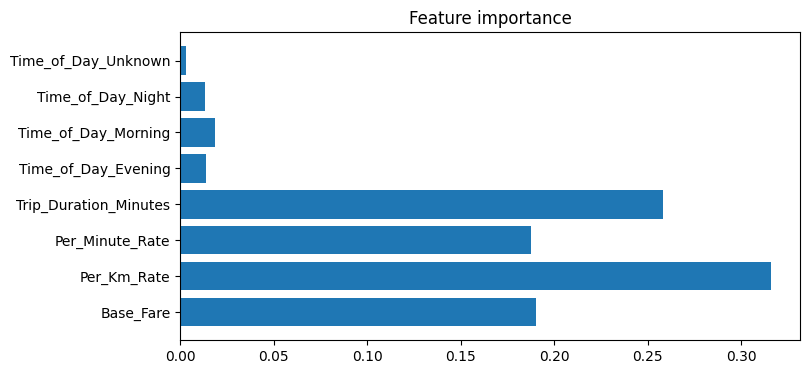

In [8]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feat_names = x_train.columns

plt.figure(figsize=(8,4))
plt.barh(feat_names, importances)
plt.title("Feature importance")
plt.show()

In [9]:
joblib.dump(model, pathlib.Path("random_forest_model.joblib"))

['random_forest_model.joblib']

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

ValueError: continuous is not supported